In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

导入数据

In [28]:
path = 'ex2data2.txt'
data = pd.read_csv(path, header=None, names=['Test1', 'Test2', 'result'])
data.head()



,Test1,Test2,result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


画出数据的散点图

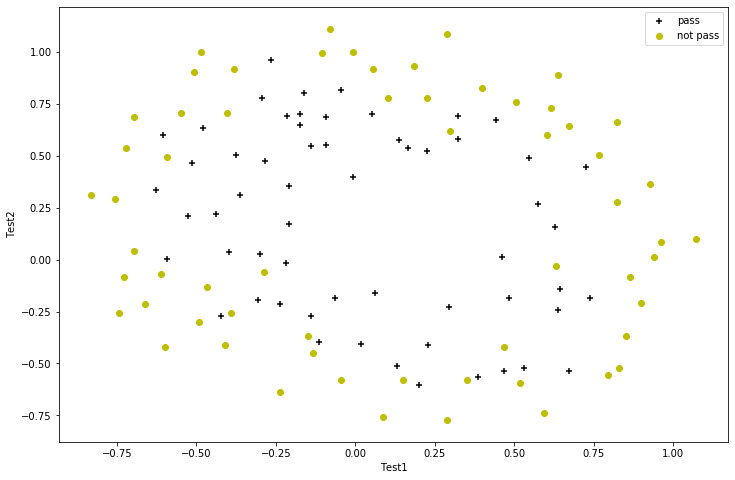

In [29]:
positive = data[data['result'].isin([1])]
negtive = data[data['result'].isin([0])]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'], positive['Test2'], c='black', marker='+', label='pass')
ax.scatter(negtive['Test1'], negtive['Test2'], c='y', marker='o', label='not pass')
plt.legend()
plt.xlabel('Test1')
plt.ylabel('Test2')
plt.show()


编写sigmoid函数

In [30]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

编写CostFunction



In [31]:
def cost(theta, X, Y, learnningrate = 1):
    theta = np.matrix(theta)
    # X = np.matrix(X)
    # Y = np.matrix(Y)
    first = np.multiply(-Y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - Y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learnningrate / (2 * len(X))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / len(X) + reg

编写gradient函数

In [32]:
def gradient_decent(theta, X, Y, learningrate = 1):
    theta = np.matrix(theta)
    # X = np.matrix(X)
    # Y = np.matrix(Y)
    step_1 = sigmoid(X * theta.T)
    first = ((step_1 - Y).T * X) / len(X)
    second = np.multiply(learningrate/len(X), theta)
    return first + second


扩充数据增加维度，以得到曲线分界线


In [33]:
def mapFeature(x1, x2):
    degree = 5
    temp = {}
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            temp["f{}{}".format(i - j, j)] = np.power(x1, i - j) * np.power(x2, j)
    result = pd.DataFrame(temp)
    result.insert(0, 'ones', 1)
    return result
    


提取数据


In [34]:
Y = data['result']
x1 = data['Test1']
x2 = data['Test2']
X = mapFeature(x1,x2)
# X.insert(0, 'ones', 1)
X.head()
cols = X.shape[1]
theta = np.zeros(cols)
X = np.matrix(X)
Y = np.matrix(Y).T
theta = np.matrix(theta)
learnningrate = 1

计算梯度下降
!!!!!特别注意在使用scipy.optimize包中的fmin_tnc函数时，传入的theta会从（1,21）的矩阵，变成一个数组，
如此一来会使cost和gradient_decent函数不能正常运行。解决该问题的方法就是在这两个函数内部将theta重新从
数组变成矩阵。

In [35]:
Y.shape
gradient_decent(theta, X, Y)
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient_decent, args=(X, Y))
print(result)

(array([ 1.14607132,  0.58915222,  1.17558641, -2.03283647, -0.88829988,
       -1.39057199,  0.04672391, -0.36935195, -0.33309412, -0.30074293,
       -1.5992483 , -0.03982298, -0.61846411, -0.2451428 , -1.37472503,
       -0.34761008, -0.21526672, -0.04422287, -0.2846862 , -0.27426244,
       -0.67102999]), 50, 4)


编写预测函数

In [36]:
def predict(X, Y, theta):
    pre_y = sigmoid(X * theta.T)
    count = 0
    for i in range(X.shape[1]):
        if (pre_y[i] >= 0.5 and Y[i] == 1) or (pre_y[i] < 0.5 and Y[i] == 0):
            count = count + 1
    print('the accuracy is %s' % str(count/X.shape[1]))

In [37]:
final_theta = np.matrix(result[0])
print(final_theta.shape)
predict(X, Y, final_theta)


(1, 21)
the accuracy is 0.9047619047619048


编写适用于分界线的投射函数

In [38]:
def MapFeatureforPlot(a1, a2):
    degree = 5
    temp = [1]
    for i in range(1, degree + 1):
        for j in range(0, i + 1):
            temp.append(np.power(a1, i - j) * np.power(a2, j))       
    temp = np.matrix(temp)
    return temp

编写分界线


(50, 50)
(50,)
(50,)
(50, 50)


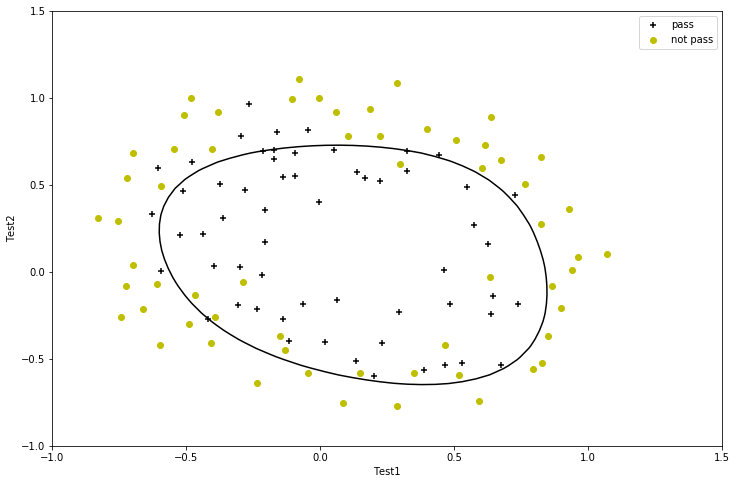

In [39]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        z[i][j] = MapFeatureforPlot(u[i], v[j]) * final_theta.T
print(z.shape)


positive = data[data['result'].isin([1])]
negtive = data[data['result'].isin([0])]
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test1'], positive['Test2'], c='black', marker='+', label='pass')
ax.scatter(negtive['Test1'], negtive['Test2'], c='y', marker='o', label='not pass')
plt.legend()
plt.xlabel('Test1')
plt.ylabel('Test2')

contour = plt.contour(u,v,z,levels=[0], colors='k')

plt.show()